The purpose of this analysis is to come up with healthcare solutions specific for the county of Nairobi  that align with Sustainable Development Goal (SDG) 3 for Universal Health.

Sustainable Development Goal 3, regarding "Good Health and Well-being", is one of the 17 Sustainable Development Goals established by the United Nations in 2015. It aims to ensure healthy lives and promote well-being for all, at all ages.

#### **Data Set**
- The data used for this analysis is population data from https://africaopendata.org/dataset/2019-kenya-population-and-housing-census
and data containing information on health facilities across the country from https://africaopendata.org/dataset/health-facilities-in-kenya

#### **Meaning of columns**

- (HCT) A hematocrit test is a simple blood test that measures the percentage of red blood cells in your blood.

- (ART) is an abbreviation for antiretroviral therapy, which is a medical treatment for people infected with HIV.
    
- (C-IMCI) stands for Community-based Integrated Management of Childhood Illnesses, that focuses on the health and well-being of the child. CIMCI aims to reduce preventable mortality, minimize illness and disability and promote healthy growth and development of children under five years of age.

- (FP) Family Practitioner gives personal, primary, and continuing care to individuals irrespective of age, sex, or illness

- (IPD) is an abbreviation for In-patient department, which is a medical facility within a hospital or healthcare center where individuals are admitted for medical treatment or surgery to manage complex medical conditions, diseases, or illnesses.
    




In [2]:
import pandas as pd
import numpy as np

In [3]:
#load the dataset
data= pd.read_excel('ehealth-kenya.xls')
data.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,Ruguru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14180,10 Engineer VCT,Rift Valley,Laikipia,Laikipia East,Central,Dispensary,Armed Forces,Nanyuki,Majengo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17486,12 Engineers,Central,Kiambu,Thika West,NaN,Dispensary,Ministry of Health,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18393,3Kl Maternity & Nursing Home,Rift Valley,Kajiado,Kajiado North,Ongata Rongai,Nursing Home,Private Practice - Clinical Officer,Gataka,Gataka,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
"""Since our analysis is centered around Nairobi, we shall filter the data frame and create a new data frame with only hospitals in Nairobi"""
df = data[data['Province'] == 'Nairobi']
df.sample(5)

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
7778,13127,Nsis Health Centre (Ruaraka),Nairobi,Nairobi,Ruaraka,Kasarani,Health Centre,Ministry of Health,Ruaraka,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8781,17938,Round About Medical Centre,Nairobi,Nairobi,Roysambu,Kasarani,Health Centre,Private Enterprise (Institution),Githurai,Githurai,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5416,19995,Evesben Foundation Medical Clinic,Nairobi,Nairobi,Kibra,Kibra,Medical Clinic,Private Practice - Clinical Officer,Laini Saba,Laini Saba,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5636,17949,Destiny Medical Centre (Ruaraka),Nairobi,Nairobi,Ruaraka,Kasarani,Dispensary,Private Practice - Unspecified,Kasarani,Kasarani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8525,19447,Provide International Hospital Mukuru,Nairobi,Nairobi,Embakasi South,NaN,Health Centre,Non-Governmental Organizations,mukuru,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
"""From our observation the dataset has 942 rows and 50 columns. The datatypes present are int,object and float and there are 
quite a number of columns with missing values"""
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 1 to 10496
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Facility Code            942 non-null    int64  
 1   Facility Name            942 non-null    object 
 2   Province                 942 non-null    object 
 3   County                   942 non-null    object 
 4   District                 942 non-null    object 
 5   Division                 914 non-null    object 
 6   Type                     942 non-null    object 
 7   Owner                    942 non-null    object 
 8   Location                 894 non-null    object 
 9   Sub Location             672 non-null    object 
 10  Description of Location  641 non-null    object 
 11  Constituency             942 non-null    object 
 12  Nearest Town             824 non-null    object 
 13  Beds                     942 non-null    float64
 14  Cots                     942 

In [6]:
# check % of missing values on columns
(df.isna().sum()/len(df) * 100).sort_values(ascending = False)

YOUTH                      100.000000
CEOC                       100.000000
GROWM                      100.000000
BEOC                       100.000000
OPD                        100.000000
OUTREACH                   100.000000
BLOOD                      100.000000
HCT                        100.000000
CAES SEC                   100.000000
PMTCT                      100.000000
RAD/XRAY                   100.000000
RHTC/RHDC                  100.000000
EPI                        100.000000
TB DIAG                    100.000000
TB LABS                    100.000000
TB TREAT                   100.000000
ANC                        100.000000
Official Fax                97.983015
C-IMCI                      92.356688
ART                         88.428875
Official Alternate No       83.333333
Official Landline           79.087049
Official Email              76.433121
HBC                         73.460722
FP                          70.276008
IPD                         68.471338
Official Mob

<Axes: >

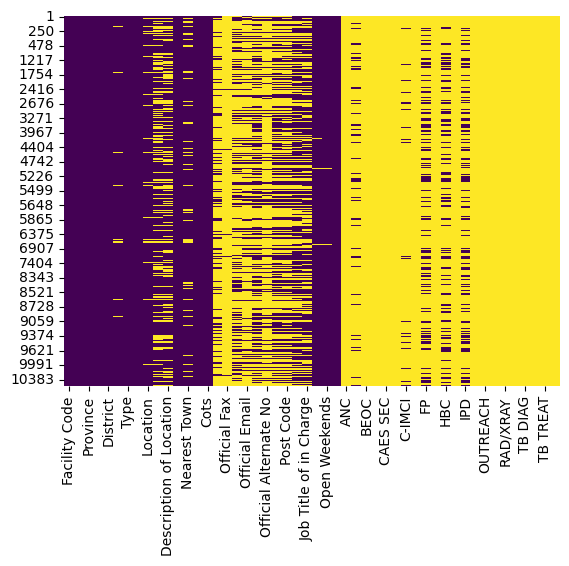

In [7]:
# visualize missing values
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [8]:
"""I need to understand whether this missing values are missing at random or not by looking at the distribution of data on the whole dataset"""
(data.isnull().sum()/len(data) * 100).sort_values(ascending=False)

YOUTH                      100.000000
CEOC                       100.000000
GROWM                      100.000000
BEOC                       100.000000
BLOOD                      100.000000
OPD                        100.000000
CAES SEC                   100.000000
HCT                        100.000000
OUTREACH                   100.000000
EPI                        100.000000
PMTCT                      100.000000
RAD/XRAY                   100.000000
RHTC/RHDC                  100.000000
TB DIAG                    100.000000
TB LABS                    100.000000
TB TREAT                   100.000000
ANC                        100.000000
Official Fax                94.859591
ART                         91.232746
Official Alternate No       90.937649
C-IMCI                      88.795812
Official Landline           86.987149
Official Email              82.322703
HBC                         73.365064
Official Mobile             72.251309
IPD                         62.465493
FP          

In [9]:
"""From our observation, we have identified columns with 100% of their information missing and others with over 70% missing data.
   The best approach for columns with no data at all is to drop them.We will also drop the 'province' and 'county' columns, as they
     are not necessary for our analysis."""

df.drop(columns=['ANC', 'BEOC',
       'CAES SEC','EPI', 'GROWM', 'HCT',
       'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY', 'RHTC/RHDC', 'TB DIAG',
       'TB LABS', 'TB TREAT', 'YOUTH','BLOOD','CEOC','Province','County'],inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18164\1572387218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['ANC', 'BEOC',


In [10]:
#look at the distribution of data in the columns with a high number of missing values in both the main dataframe and the filtered dataframe

#distribution in the filtered dataframe
columns = df[['C-IMCI','ART','HBC','FP','IPD']]

value_counts = columns.apply(lambda x:x.value_counts())
print(value_counts)

#distribution in the main dataframe
columns_data = data[['C-IMCI','ART','HBC','FP','IPD']]

value_counts_data = columns_data.apply(lambda x:x.value_counts())
print(value_counts_data) 

   C-IMCI  ART  HBC   FP  IPD
Y      72  109  250  280  297
   C-IMCI  ART   HBC    FP   IPD
Y    1177  921  2798  4288  3943


In [11]:
"""From our observation Y, is an indication of the availability of the specified services while N represents their absense.
   Y in this case is the only unique value in the specified columns. The null values in the columns would be an indication of
  their absence.Therefore ill make an assumption that the values are missing at random and peform logical imputation by replacing 
  NAN values with N """

#fill null values
column = ['C-IMCI','ART','HBC','FP','IPD']
df.loc[:, column] = df.loc[:, column].fillna('N')

#assert changes
df[['C-IMCI','ART','HBC','FP','IPD']].isna().any()

C-IMCI    False
ART       False
HBC       False
FP        False
IPD       False
dtype: bool

In [12]:
"""no duplicated values"""
#check for duplicate values
df.duplicated().any() 


False

In [13]:
#closer look at other columns with missing values
col =df[['Open 24 Hours','Open Weekends']]

#unique values for open 24 hours column
hrs= df['Open 24 Hours'].unique()

#unique values for open weekends column
wkds=df['Open Weekends'].unique()

#count of unique values
counts= col.apply(lambda x:x.isna().sum())
counts,wkds,hrs

(Open 24 Hours    11
 Open Weekends     9
 dtype: int64,
 array(['Y', 'N', nan], dtype=object),
 array(['N', 'Y', nan], dtype=object))

In [14]:
"""The observation indicates that the unique values in this particular columns are either N,Y or NaN.We will make an assumption that
 the null values on this column indicate the absence of this services. Therefore we will make use of logical imputation and replace 
 all the null values with N"""

cols = ['Open 24 Hours','Open Weekends']

#fill null values
df.loc[:, cols] = df.loc[:,cols].fillna('N')

#assert there are no more null values
df[['Open Weekends','Open 24 Hours']].isna().any()

Open Weekends    False
Open 24 Hours    False
dtype: bool

In [15]:
#drop this columns as i shall not be needing them in my analysis. 
#dropping the sub location column as i can make use of the division column instead

df.drop(columns=['Official Alternate No','Official Landline','Official Email','Official Alternate No',
'Official Mobile','Official Address','Official Fax','Post Code','Description of Location','Town',
'Nearest Town','District','Sub Location'],inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18164\2641818463.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Official Alternate No','Official Landline','Official Email','Official Alternate No',


In [18]:
import warnings
warnings.filterwarnings('ignore')

#drop all the null values as only a small % of data is null
df.dropna(subset=['Location', 'Division'], inplace=True)


In [19]:
#have a closer look at the in charge and job title column

from pandasql import sqldf
q1 = """SELECT [Job Title of in Charge],[In Charge] FROM df
        LIMIT 10"""
pysqldf  = sqldf(q1)
results = pysqldf
results

,Job Title of in Charge,In Charge
0,Clinical Officer,Caroline Achieng
1,Nursing Officer in Charge,Captain Murunga
2,Medical Superintendant,Dr Mbuthia Wacera
3,Doctor In Charge,Dr. Alma Okudo
4,Nursing Officer in Charge,None
5,Hospital Director,Dr Kamau David
6,Nursing Officer in Charge,Eunice Kamau
7,None,None
8,Nursing Officer in Charge,Stephanie Mutunga
9,Nursing Officer in Charge,Sarah Orinda


In [20]:
"""The information contained in these two columns is highly specific and cannot be reliably imputed without additional context. Ill only need the
Job Title In Charge Column for my analysis, therefore ill drop the in charge column and ignore the missing values in the job title column"""
#drop columns
df.drop(columns = 'In Charge',inplace = True)

In [21]:
#remove trailing spaces for all the rows
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

# convert all the rows to lowercase
df = df.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

In [22]:
# closer look at the location column
df['Location'].unique()

array(['huruma', 'mugumoini', 'woodly', 'central business district',
       'parklands', 'embakasi', "lang'ata", 'kasarani', 'roysambu',
       'upper savanna', 'pumwani', 'kangemi', 'githurai', 'central',
       'viwandani', 'ruaraka', 'kawangware', 'eastleigh north',
       'githunguri', 'kibera', 'bahati', 'kayole', 'kariokor', 'kilimani',
       'nairobi west', 'karen', 'pipeline', 'makadara', 'mukuru nyayo',
       'korogocho', 'njiru', 'community', 'dandora', 'kibra', 'landmawe',
       'eastleigh section i', 'uthiru/ruthimitu', 'ngando', 'city cenre',
       'ngara', 'kahawa west', 'nairobi south', 'mutuini',
       'jericho- lumumba', 'kwa njenga', 'woodley', 'golfcourse',
       'mathare', 'landi mawe', 'kiambiu', 'lumumba', 'lavington',
       'utawala', 'makina', 'pangani', 'maringo', 'langata',
       'wanyee road', 'l/kabete', 'ramesh gautama road', 'riruta',
       'kariobangi', 'umoja', 'laini saba', "sarang'ombe", 'makogeni',
       'kariobangi south', 'mukuru', 'sateli

In [23]:
#count of unique values
len(df['Location'].unique())

130

In [24]:
# rectifying the spelling errors on the location column

#correctly spell gthurai
df['Location'] = df['Location'].replace('gthurai','githurai')

#correctly spell makogeni
df['Location'] = df['Location'].replace('makogeni','makongeni')

#remove the dash in 'jericho- lumumba'
df['Location'] = df['Location'].replace('jericho-lumumba','jericho lumumba')
df['Location'] = df['Location'].replace('jericho- lumumba','jericho lumumba')

#correctly spell landmawe
df['Location'] = df['Location'].replace('landmawe' ,'landi mawe')

#remove the spacing in ' dandora '
df['Location'] = df['Location'].replace(' dandora ' , 'dandora')

#correctly spell city cenre and centre
df['Location']=df['Location'].replace('city cenre','city center')
df['Location'] = df['Location'].replace('city centre','city center')

# correctly spell 'parlands' parklands
df['Location'] = df['Location'].replace('parlands','parklands')

# correctly spell kitusuru
df['Location'] = df['Location'].replace('kitusuru','kitisuru')

#correctly spell rurak
df['Location'] = df['Location'].replace('ruarak','ruaraka')

# correctly spell khn
df['Location'] = df['Location'].replace('khn','knh')

# correctly spell mukuru kwanjega
df['Location'] = df['Location'].replace('mukuru kwanjega','mukuru kwanjenga')

#correctly spell 'kawagware'
df['Location'] = df['Location'].replace('kawagware','kawangware')

#correctly spell keyole
df['Location'] = df['Location'].replace('keyole','kayole')

#correctly spell kibera
df['Location']=df['Location'].replace('kibera','kibra')

# rewrite woodly
df['Location'] = df['Location'].replace('woodly','woodley')

# rewrite savanna
df['Location'] = df['Location'].replace('savanna','savannah')

#rewrite eastleigh section 111
df['Location'] = df['Location'].replace('eastleigh section 111','eastleigh section iii')

In [25]:
#assert changes. Initially there were 130 unique values
len(df['Location'].unique())

113

In [26]:
#have a closer look at the division column
df['Division'].unique()

array(['huruma', "lang'ata", 'woodly', 'starehe', 'parklands', 'embakasi',
       'kasarani', 'roysambu', 'embakasi east', 'pumwani', 'kangemi',
       'central', 'viwandani', 'kawangware', 'eastleigh north', 'ruai',
       'kibra', 'dagoretti', 'bahati', 'kariokor', 'kilimani', 'ruaraka',
       'mukuru', 'makadara', 'south b', 'kayole', 'njiru',
       'knh golf course', 'dandora', 'city centre', 'ngara',
       'eastleigh south', 'kileleshwa', 'riruta', 'kitisuru', 'langata',
       'kariobangi', "lan'gata", 'kariobangi south', 'dagoretti south',
       'savannah', 'nairobi south', 'westlands', 'karura',
       'eastleign south', 'dagoretti north', 'kibera', 'kitusuru',
       'kawagware', 'umoja', 'city square', 'woodley', 'kitsuru',
       'golf course', 'kasrani', 'mathare', 'waithaka', 'highridge',
       'knh/golf course', 'kamukunji', 'kenyatta', "sarang'ombe",
       'mutuini', 'embakasi kayole', 'rotysambu', 'embakasi west',
       'mukurui', 'lower kabete', 'mountain view',

In [27]:
# initial number of unique values
len(df['Division'].unique())

70

In [28]:
#rectify spelling mistakes on the division column

#correctly spell woodly
df['Division'] = df['Division'].replace('woodly','woodley')

#correctly spell lan'gata
df['Division'] = df['Division'].replace("lan'gata","lang'ata")

#correctly spell kitsuru and kitusuru
df['Division'] = df['Division'].replace(['kitsuru','kitusuru'],'kitisuru')

#correctly spell kibera
df['Division'] = df['Division'].replace('kibera','kibra')

#remove foward slash
df['Division'] = df['Division'].replace('knh/golf course','knh golf course')

#correctly spell kawagware
df['Division'] = df['Division'].replace('kawagware','kawangware')

#correctly spell roytsambu
df['Division'] = df['Division'].replace('rotysambu','roysambu')


In [29]:
#assert changes
len(df['Division'].unique())

62

In [31]:
# change float dtypes to int
df[['Beds','Cots']]=df[['Beds','Cots']].astype(int)

In [32]:
df=pd.read_csv('nairobi_data.csv')

In [33]:
df.head(5)

,Facility Code,Facility Name,Division,Type,Owner,Location,Constituency,Beds,Cots,Job Title of in Charge,Open 24 Hours,Open Weekends,Operational Status,ART,C-IMCI,FP,HBC,IPD
0,19310,st jude's huruma community health services,huruma,medical clinic,private practice - unspecified,huruma,mathare,0,0,clinical officer,n,y,operational,n,n,n,n,n
1,13043,7kr mrs health centre,lang'ata,health centre,armed forces,mugumoini,lang'ata,14,0,nursing officer in charge,y,y,operational,n,y,y,y,y
2,20346,aar adams health centre,woodley,medical clinic,private practice - general practitioner,woodley,kibra,0,0,medical superintendant,n,y,operational,n,n,n,n,n
3,12861,aar city centre clinic,starehe,medical clinic,private enterprise (institution),central business district,starehe,0,0,doctor in charge,n,y,operational,n,n,y,n,y
4,16796,aar clinic sarit centre (westlands),parklands,medical clinic,private enterprise (institution),parklands,westlands,0,0,nursing officer in charge,n,n,operational,n,n,n,n,n


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Facility Code           889 non-null    int64 
 1   Facility Name           889 non-null    object
 2   Division                889 non-null    object
 3   Type                    889 non-null    object
 4   Owner                   889 non-null    object
 5   Location                889 non-null    object
 6   Constituency            889 non-null    object
 7   Beds                    889 non-null    int64 
 8   Cots                    889 non-null    int64 
 9   Job Title of in Charge  529 non-null    object
 10  Open 24 Hours           889 non-null    object
 11  Open Weekends           889 non-null    object
 12  Operational Status      889 non-null    object
 13  ART                     889 non-null    object
 14  C-IMCI                  889 non-null    object
 15  FP    

### Convert our csv into a database

In [5]:
import sqlite3

In [6]:
conn =sqlite3.connect("health_data.db")
cursor = conn.cursor()

In [7]:
df.columns

Index(['Facility Code', 'Facility Name', 'Division', 'Type', 'Owner',
       'Location', 'Constituency', 'Beds', 'Cots', 'Job Title of in Charge',
       'Open 24 Hours', 'Open Weekends', 'Operational Status', 'ART', 'C-IMCI',
       'FP', 'HBC', 'IPD'],
      dtype='object')

In [12]:
drop_table_sql = 'DROP TABLE IF EXISTS health_info;'
cursor.execute(drop_table_sql)

In [13]:
query1 = """CREATE TABLE health_info(
    facility_code INT PRIMARY KEY,
    facility_name TEXT,
    division TEXT,
    type TEXT,
    owner TEXT,
    location TEXT,
    Beds FLOAT,
    cots FLOAT,
    job_title_in_charge TEXT,
    open_24_hrs TEXT,
    open_weekends, TEXT,
    operational_status TEXT,
    art TEXT,
    cimci TEXT,
    fp TEXT,
    hbc TEXT,
    ipd TEXT )"""
cursor.execute(query1)
conn.commit()

In [14]:
df.to_sql('health_info',conn,if_exists='replace',index=False)

889

In [15]:
file = 'health_info.sql'
with open(file,'w') as f:
    for line in conn.iterdump():
        f.write('%s\n' % line)       


In [17]:
print(f'SQL dump saved to {file}')

SQL dump saved to health_info.sql


In [20]:
with open('health_info.sql', 'r') as file:
    sql_dump = file.read()

# Replace double quotes with backticks (or remove them)
mysql_dump = sql_dump.replace('"', '`')

# Save the modified SQL dump
with open('health_info.sql', 'w') as file:
    file.write(mysql_dump)

print("Modified SQL dump saved to 'health_info.sql'")


Modified SQL dump saved to 'health_info.sql'
